Load .out file and show the Tb vs frequency plot

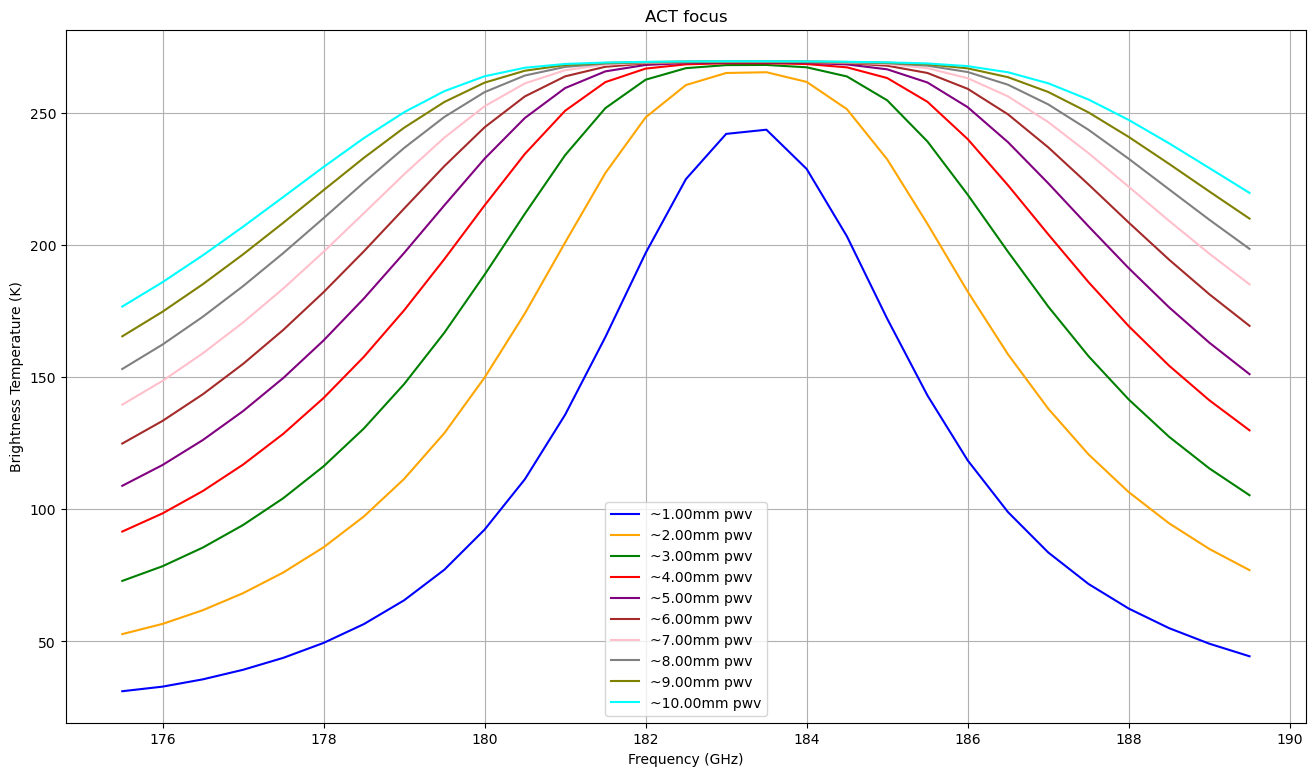

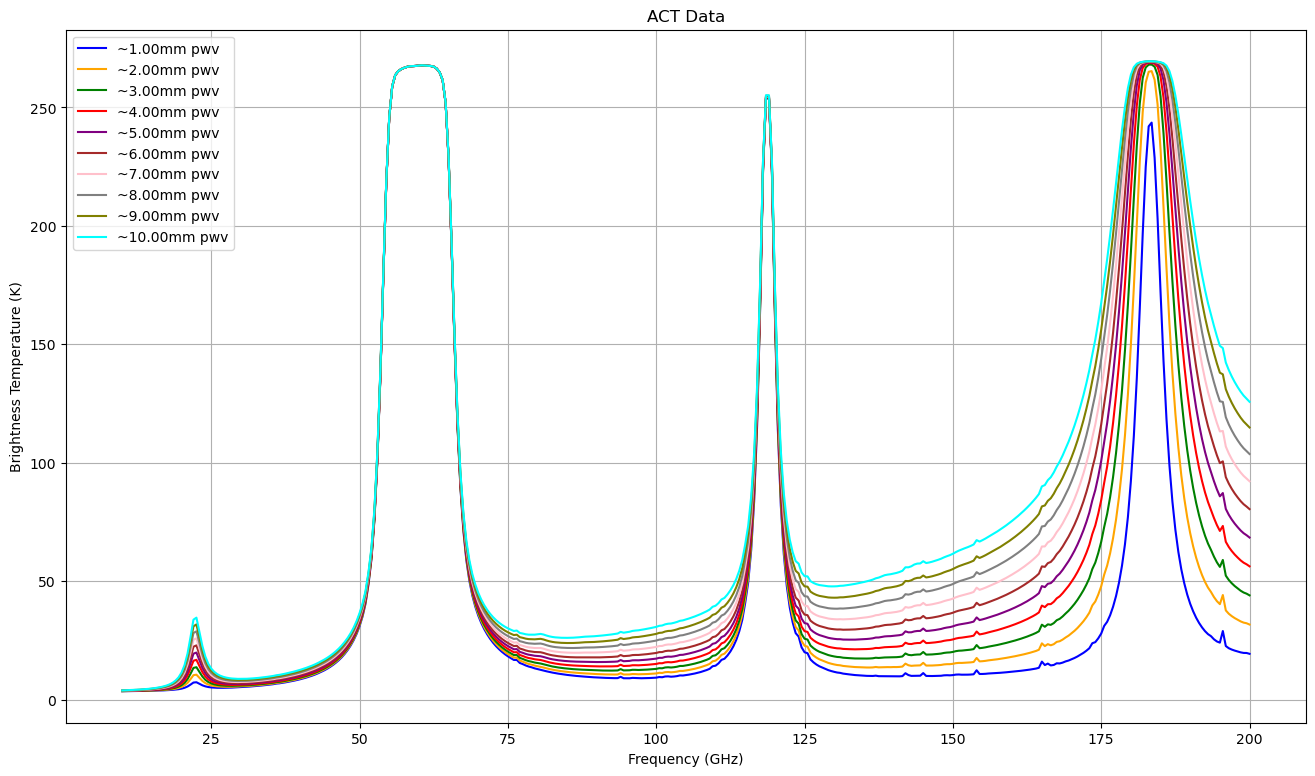

In [ ]:
import os
import warnings
import subprocess
from io import BytesIO
from typing import Dict
from pathlib import Path
from datetime import datetime
from matplotlib.pylab import loadtxt
from packaging import version
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

from astropy import units as u
from astropy import constants as c

output_data = np.loadtxt("1_10pwv_inp.txt")
#print(output_data)
#seperate the rows by PWV
out_dict: Dict[str, Dict[str,list]] = {}
for row in output_data:

    if row[1] == 0:
        key = f"{row[0]:.2f}mm pwv"
        out_dict[key] = {}

    elif row[1] != 0:
        #add the frequency and brightness temperature to the dictionary
        #key = f"{row[0]:.2f}mm pwv"
        if "frequencies" not in out_dict[key]:
            out_dict[key]["frequencies"] = []
            out_dict[key]["brightness_temperature"] = []
        out_dict[key]["frequencies"].append(row[0])
        out_dict[key]["brightness_temperature"].append(row[1])

        
#print(out_dict)

# fre = output_data[:, 0] * u.GHz
# Tb = output_data[:, 1] * u.K

colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

fig0,ax0 = plt.subplots(figsize=(16, 9))
fig1,ax1 = plt.subplots(1, 1, figsize=(16, 9))

for key in out_dict:
    fre = np.array(out_dict[key]["frequencies"]) * u.GHz
    Tb = np.array(out_dict[key]["brightness_temperature"]) * u.K
    fre_foc = []
    Tb_foc = []

    #plot the data

    #only plot if fre between 170 and 190 GHz
    for i in range(len(fre)):
        
        if fre[i] > 175 * u.GHz and fre[i] < 190 * u.GHz:
            fre_foc.append(fre[i])
            Tb_foc.append(Tb[i])            

    ax0.plot([f.value for f in fre_foc], [t.value for t in Tb_foc], color=colors[0], label=f"~{key}")
    ax0.set_xlabel('Frequency (GHz)')
    ax0.set_ylabel('Brightness Temperature (K)')
    ax0.set_title('ACT focus')
    ax0.grid(True)
    ax0.legend()

    ax1.plot(fre.value, Tb.value, label=f"~{key}", color=colors.pop(0))
    ax1.set_xlabel('Frequency (GHz)')
    ax1.set_ylabel('Brightness Temperature (K)')
    ax1.set_title('ACT Data')
    #ax1.grid(True)
    ax1.legend()

fig1.savefig("ACT 1-10pwv.svg")
fig0.savefig("ACT 1-10pwv focus.svg")

plt.show()




In [ ]:
#test dict

dict = {'1mm pwv':{'fre':[1,2,3],'Tb':[4,5,6]}}
print(dict[0])